In [1]:
# load the module
%load_ext autoreload
%autoreload 2

import Generating_Problems as Generator
import RQAOA
import QIRO_MAX_2_SAT
import networkx as nx
#from QIRO_MIS import QIRO
import Simulated_Annealing as SA
import Parallel_Tempering as PT

### MAX-2-SAT

In [2]:
# Generate Max-2-SAT problem for RQAOA
# number of variables and clauses:
num_var = 20
num_clauses = 100
seed = 420
# generate a random problem instance
generated_problem_RQAOA = Generator.MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)


In [3]:
# Run RQAOA
# nc is the problem size that we brute force in the end.
nc = 3
# create RQAOA object
RQ = RQAOA.RQAOA(problem_input=generated_problem_RQAOA, nc=nc, type_of_problem = "MAX_2_SAT")
# run RQAOA
E, solution = RQ.execute()

RQAOA Step: 1


/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


RQAOA Step: 2
RQAOA Step: 3
RQAOA Step: 4
RQAOA Step: 5
RQAOA Step: 6
RQAOA Step: 7
RQAOA Step: 8
RQAOA Step: 9
RQAOA Step: 10
RQAOA Step: 11
RQAOA Step: 12
RQAOA Step: 13
RQAOA Step: 14
RQAOA Step: 15
RQAOA Step: 16
RQAOA Step: 17


In [4]:
print(f"RQAOA Number of violations: {E}")

RQAOA Number of violations: 11


In [5]:
# Generate Max-2-SAT problem for QIRO
generated_problem_QIRO = Generator.MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)

In [6]:
# Execute QIRO Max-2-SAT algorithm with or without backtracking (BT)
BT = True
nc = 3
E_best_backtrack, E_first, first_solution, improved_backtrack_solution = \
QIRO_MAX_2_SAT.QIRO_BT_execute(nc=nc, generated_problem=generated_problem_QIRO, BT=BT)

In [7]:
print(f"QIRO Number of violations: {E_first}\nQIRO + BT Number of violations: {E_best_backtrack}")

QIRO Number of violations: 11
QIRO + BT Number of violations: 10


In [84]:
# Generate Max-2-SAT problem for Simulated Annealing (SA)
# number of variables and clauses:
num_var = 10
num_clauses = 15
seed = 420
# generate a random problem instance
generated_problem_SA = Generator.MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)

In [85]:
# Run Simulated Annealing
num_iterations = 100 * num_var
temp = 1/6 * num_iterations
SA_seed = 425
# calculate solution and corresponding energy of SA
E_shifted, solution = SA.Execute(problem_matrix=generated_problem_SA.matrix, variables=generated_problem_SA.var_list, num_iterations=num_iterations, temp=temp, random_seed=SA_seed)
# calculate number of violated clauses of SA solution
E = generated_problem_SA.calc_violated_clauses(solution)
print(f"SA Number of violations: {E}")

SA Number of violations: 0


In [3]:
# Generate Max-2-SAT problem for Parallel Tempering (PT)
# number of variables and clauses:
num_var = 10
num_clauses = 15
seed = 420
# generate a random problem instance
generated_problem_PT = Generator.MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)

In [4]:
# Run Parallel Tempering (PT)
num_cycles = 200
num_per_sweep = num_var
num_replicas = 15
num_swaps = num_replicas - 1
T_min = 1
T_max = 2.2
PT_seed = 425

# calculate solution and corresponding energy of PT
E_shifted, solution, acceptance_vector = PT.Execute(problem_matrix=generated_problem_PT.matrix, variables=generated_problem_PT.var_list, num_cycles=num_cycles, 
                                 num_per_sweep=num_per_sweep, num_swaps=num_swaps, num_replicas=num_replicas, T_min=T_min, T_max=T_max, random_seed=PT_seed)
# calculate number of violated clauses of PT solution
E = generated_problem_PT.calc_violated_clauses(solution)
print(f"PT Number of violations: {E}")

PT Number of violations: 0


### MIS

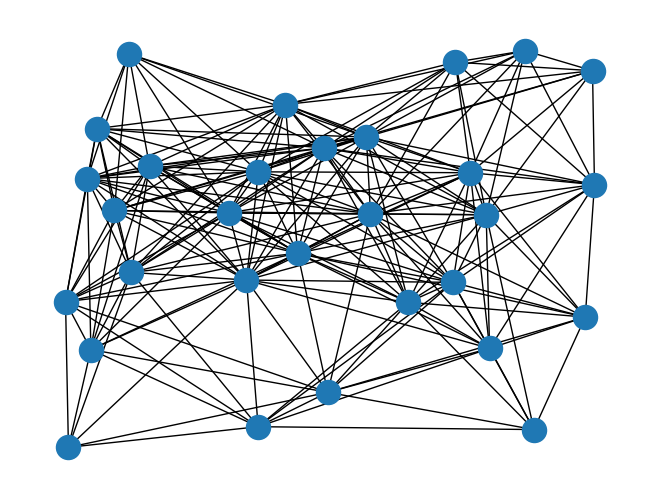

In [8]:
# create some test graph. Feel free to change this to whatever graph you want to visualize and use.

graph = nx.random_geometric_graph(30, 0.5)

nx.draw(graph)

In [9]:
problem = Generator.MIS(graph, alpha=1.1)

In [10]:
# generate the problem in the appropriate format for QIRO and RQAOA
# This includes setting the soft penalty term alpha. (Here not named lambda :D)

problem = Generator.MIS(graph, alpha=1.1)

nc = 3

RQ = RQAOA.RQAOA(problem_input=problem, nc=nc, type_of_problem = "MIS")
E, solution = RQ.execute()

RQAOA Step: 1


/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


RQAOA Step: 2
RQAOA Step: 3
RQAOA Step: 4


/Users/q521093/opt/anaconda3/envs/rqaoa/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


RQAOA Step: 5
RQAOA Step: 6
RQAOA Step: 7
RQAOA Step: 8
RQAOA Step: 9
RQAOA Step: 10
RQAOA Step: 11
RQAOA Step: 12
RQAOA Step: 13
RQAOA Step: 14
RQAOA Step: 15
RQAOA Step: 16
RQAOA Step: 17
RQAOA Step: 18
RQAOA Step: 19
RQAOA Step: 20
RQAOA Step: 21
RQAOA Step: 22
RQAOA Step: 23
RQAOA Step: 24
RQAOA Step: 25
RQAOA Step: 26
RQAOA Step: 27


In [11]:
print("RQAOA; Number of violations: {}. Size of IS found: {}".format(*problem.evaluate_solution(solution)))

RQAOA; Number of violations: 0. Size of IS found: 4


In [12]:
problem = Generator.MIS(graph, alpha=1.1)

qiro = QIRO(problem, nc=3)

qiro.execute()

Step: 1. Number of nodes: 30.
single var [12]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[12]]. Moving on.
Step: 2. Number of nodes: 29.
single var [18]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[18]]. Moving on.
Step: 3. Number of nodes: 28.
single var [22]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[22]]. Moving on.
Step: 4. Number of nodes: 27.
single var [1]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[1]]. Moving on.
Step: 5. Number of nodes: 26.
single var [19]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[19]]. Moving on.
Step: 6. Number of nodes: 25.
single var [23]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[23]]. Moving on.
Step: 7. Number of nodes: 24.
single var [8]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[8]]. Moving on.
Step: 8. Number of nodes: 23.
single var [11]. Sign: -1
Pruned 0 v

In [13]:
print("QIRO; Number of violations: {}. Size of IS found: {}".format(*problem.evaluate_solution(qiro.solution)))

QIRO; Number of violations: 0. Size of IS found: 4


In [ ]:
# Generate Max-2-SAT problem for RQAOA
# number of variables and clauses:
num_var = 20
num_clauses = 100
seed = 420
# generate a random problem instance
generated_problem_RQAOA = Generator.MAX2SAT(num_var=num_var, num_clauses=num_clauses, seed=seed)